# Statistics

A notebook to evaluate the statistics of the thesis.

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Alpha, P300, c-VEP against ICA versions

In [4]:
## --- cVEP ---
# Accuracy for c-VEP without ICA
cVEP_results = np.load('/Users/juliette/Desktop/thesis/results/c-VEP/c-VEP_rcca.npz')
cVEP_accuracy = cVEP_results['accuracy'] 

covert_mean_cVEP = cVEP_accuracy[:, 1, :].mean()
cVEP_se = cVEP_results['accuracy_se']
print(f"Average accuracy for covert trials: {covert_mean_cVEP:.3f}")
print(f"Average se for covert trials: {cVEP_se.mean():.3f}")

# Accuracy for c-VEP with ICA
cVEP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/c-VEP/c-VEP_ICA/c-VEP_rcca_ICA.npz')
cVEP_ICA_accuracy = cVEP_ICA_results['accuracy'] 

cVEP_ICA_se = cVEP_ICA_results['accuracy_se']
covert_ICA_mean_cVEP = cVEP_ICA_accuracy[:, 1, :].mean()
print(f"Average accuracy for covert trials and ICA: {covert_ICA_mean_cVEP:.3f}")
print(f"Average se for covert trials and ICA: {cVEP_ICA_se.mean():.3f}")


## --- ALPHA ---
# Accuracy for PSD without ICA
alpha_PSD_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/covert_alpha_PSD_results.npy')
alpha_PSD_sd = alpha_PSD_results['standard_error']
alpha_PSD_accuracy = alpha_PSD_results['accuracy']
alpha_PSD_mean_accuracy = np.round(alpha_PSD_accuracy.mean(), 2)

print(f"Overall LDA accuracy with PSD (covert): {alpha_PSD_mean_accuracy:.2f} ± {alpha_PSD_sd.mean():.2f}")

# Accuracy for CSP without ICA
alpha_CSP_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/covert_alpha_4-comp_CSP_results.npy')

alpha_CSP_sd = alpha_CSP_results['standard_error']
alpha_CSP_accuracy = alpha_CSP_results['accuracy']
alpha_CSP_mean_accuracy = np.round(alpha_CSP_accuracy.mean(), 2)

print(f"Overall LDA accuracy with CSP (covert): {alpha_CSP_mean_accuracy:.2f} ± ± {alpha_CSP_sd.mean():.2f}")

# Accuracy for CSP with ICA
alpha_CSP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_4-comp_CSP_ICA_results.npy')

alpha_CSP_ICA_accuracy = alpha_CSP_ICA_results['accuracy']
alpha_CSP_ICA_sd = alpha_CSP_ICA_results['standard_error']
alpha_CSP_ICA_mean_accuracy = np.round(alpha_CSP_ICA_accuracy.mean(), 2)

print(f"Overall LDA accuracy with CSP and ICA (covert): {alpha_CSP_ICA_mean_accuracy:.2f} ± {alpha_CSP_ICA_sd.mean():.2f}")

# Accuracy for PSD with ICA
alpha_PSD_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_PSD_ICA_results.npy')

alpha_PSD_ICA_accuracy = alpha_PSD_ICA_results['accuracy']
alpha_PSD_ICA_mean_accuracy = np.round(alpha_PSD_ICA_accuracy.mean(), 2)
alpha_PSD_ICA_sd = alpha_PSD_ICA_results['standard_error']

print(f"Overall LDA accuracy with PSD and ICA (covert): {alpha_PSD_ICA_mean_accuracy:.2f} ± {alpha_PSD_ICA_sd.mean():.2f}")

## --- P300 ---
# Accuracy for p300 without ICA
p300_results = np.load('/Users/juliette/Desktop/thesis/results/P300/covert_lda_p300_results.npy')

p300_accuracy = p300_results['correct_trials_mean']
p300_mean_accuracy_ = p300_results[p300_results['subject_id'] == 'Overall']
p300_mean_accuracy = p300_mean_accuracy_['correct_trials_mean'][0]
p300_sd = p300_mean_accuracy_['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300 (covert): {p300_mean_accuracy:.2f} + {p300_sd.mean():.2f}")


# Accurady for p300 with ICA
p300_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/P300/p300_ICA/covert_lda_p300_ICA_results.npy')

p300_ICA_accuracy = p300_ICA_results['correct_trials_mean']
p300_ICA_mean_accuracy_ = p300_ICA_results[p300_ICA_results['subject_id'] == 'Overall']
p300_ICA_mean_accuracy = p300_ICA_mean_accuracy_['correct_trials_mean'][0]
p300_ICA_sd = p300_ICA_mean_accuracy_['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300 and ICA (covert): {p300_ICA_mean_accuracy:.2f} + {p300_ICA_sd:.2f}")



Average accuracy for covert trials: 0.660
Average se for covert trials: 0.020
Average accuracy for covert trials and ICA: 0.661
Average se for covert trials and ICA: 0.020
Overall LDA accuracy with PSD (covert): 0.81 ± 0.04
Overall LDA accuracy with CSP (covert): 0.86 ± ± 0.03
Overall LDA accuracy with CSP and ICA (covert): 0.86 ± 0.03
Overall LDA accuracy with PSD and ICA (covert): 0.82 ± 0.03
Overall LDA accuracy with P300 (covert): 0.98 + 0.01
Overall LDA accuracy with P300 and ICA (covert): 0.98 + 0.00


### Plotting

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines


# Accuracy and error values
accuracies = np.array([
    covert_mean_cVEP, covert_ICA_mean_cVEP,
    alpha_PSD_mean_accuracy, alpha_PSD_ICA_mean_accuracy,
    alpha_CSP_mean_accuracy, alpha_CSP_ICA_mean_accuracy,
    p300_mean_accuracy, p300_ICA_mean_accuracy
])
errors = np.array([
    np.mean(cVEP_se), np.mean(cVEP_ICA_se),
    np.mean(alpha_PSD_sd), np.mean(alpha_PSD_ICA_sd),
    np.mean(alpha_CSP_sd), np.mean(alpha_CSP_ICA_sd),
    np.mean(p300_sd), np.mean(p300_ICA_sd)
])

# Grouped labels
marker_labels = ['c-VEP', 'Alpha (PSD)', 'Alpha (CSP)', 'P300']
n_groups = len(marker_labels)

# Organize accuracy and error per group: shape (4, 2) for [non-ICA, ICA]
accuracies_grouped = accuracies.reshape(n_groups, 2)
errors_grouped = errors.reshape(n_groups, 2)

# Define x positions
x = np.arange(n_groups)
bar_width = 0.35

# Academic muted colors
base_colors = {
    'c-VEP': '#8da0cb',      # Muted Blue
    'Alpha (PSD)': '#66a061',  # Muted Green
    'Alpha (CSP)': '#fc8d62',  # More muted Orange
    'P300': '#d05858'       # Muted Deep Red
}
ica_colors = {
    'c-VEP': '#4c6ca0',      # Dark Blue
    'Alpha (PSD)': '#3b6f41',  # Dark Green
    'Alpha (CSP)': '#c7532b',  # Dark Orange
    'P300': '#a33333'       # Dark Red
}

# Assign colors
colors_non_ica = [base_colors[m] for m in marker_labels]
colors_ica = [ica_colors[m] for m in marker_labels]
sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

bars1 = ax.bar(x - bar_width/2, accuracies_grouped[:, 0], bar_width, yerr=errors_grouped[:, 0],
               label='Without ICA', color=colors_non_ica, capsize=5)
bars2 = ax.bar(x + bar_width/2, accuracies_grouped[:, 1], bar_width, yerr=errors_grouped[:, 1],
               label='With ICA', color=colors_ica, capsize=5)

# Font size matching Overleaf \normalsize (approx 10pt)

# Labels and ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neural Marker', fontsize=fontsize)
ax.set_title('Classification Accuracies With and Without ICA')
ax.set_xticks(x)
ax.set_xticklabels(marker_labels)
ax.set_ylim(0, 1)
ax.tick_params(axis='y')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
legend_handles = [
    mpatches.Patch(color=base_colors['c-VEP'], label='c-VEP'),
    mpatches.Patch(color=base_colors['Alpha (PSD)'], label='Alpha (PSD)'),
    mpatches.Patch(color=base_colors['Alpha (CSP)'], label='Alpha (CSP)'),
    mpatches.Patch(color=base_colors['P300'], label='P300'),
    mpatches.Patch(color='black', label='ICA (darker shade)'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower right')
plt.axhline(0.5, linestyle='--', color='black')

# Save
plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/accuracy_comparison_groupedNEW.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


In [5]:
from scipy import stats

# Compare Wilcoxon test for decoding with and without ICA
# c-VEP decoding
w_stat_cvep, p_value_w_cvep = stats.wilcoxon(cVEP_accuracy[:, 1, :].flatten(), cVEP_ICA_accuracy[:, 1, :].flatten(), alternative='greater')
print(f"Wilcoxon test for c-VEP without vs with ICA: W={w_stat_cvep:.3f}, p={p_value_w_cvep:.3f}")

# P300 decoding
w_stat_p300, p_value_w_p300 = stats.wilcoxon(p300_accuracy[:-1], p300_ICA_accuracy[:-1], alternative='greater') # Exclude the last entry: overall accuracy
print(f"Wilcoxon test for P300 without vs with ICA: W={w_stat_p300:.3f}, p={p_value_w_p300:.3f}")
    
# Alpha decoding (PSD)
w_stat_psd, p_value_w_psd = stats.wilcoxon(alpha_PSD_accuracy.flatten(), alpha_PSD_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for PSD without vs with ICA: W={w_stat_psd:.3f}, p={p_value_w_psd:.3f}")

# Alpha decoding (CSP)
w_stat_csp, p_value_w_csp = stats.wilcoxon(alpha_CSP_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for CSP without vs with ICA: W={w_stat_csp:.3f}, p={p_value_w_csp:.3f}")

print(p300_ICA_accuracy[:-1].mean() - p300_accuracy[:-1].mean())

Wilcoxon test for c-VEP without vs with ICA: W=851.000, p=0.684
Wilcoxon test for P300 without vs with ICA: W=75.500, p=0.348
Wilcoxon test for PSD without vs with ICA: W=87.000, p=0.839
Wilcoxon test for CSP without vs with ICA: W=116.000, p=0.198
-0.0017241379310343197


In [26]:
alpha_PSD_accuracy.shape


(29,)

# alpha CSP against alpha PSD

In [6]:
# Comparison of alpha decoding with PSD and CSP
w_stat_psd, p_value_w_psd = stats.wilcoxon(alpha_PSD_accuracy.flatten(), alpha_CSP_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for PSD against CSP: W={w_stat_psd:.3f}, p={p_value_w_psd:.3f}")

w_stat_psd_ICA, p_value_w_psd_ICA = stats.wilcoxon(alpha_PSD_ICA_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='greater')
print(f"Wilcoxon test for PSD against CSP both with ICA: W={w_stat_psd_ICA:.3f}, p={p_value_w_psd_ICA:.3f}")

Wilcoxon test for PSD against CSP: W=81.500, p=0.997
Wilcoxon test for PSD against CSP both with ICA: W=84.500, p=0.982


## LDA versus BlockToeplitz LDA

In [7]:
# --- P300 ---
# Accurady for p300 with ICA and BlockToeplitz
p300_ICA_TP_results = np.load('/Users/juliette/Desktop/thesis/results/P300/p300_ICA/covert_toeplitzLDA_p300_ICA_results.npy')

p300_ICA_TP_accuracy = p300_ICA_TP_results['correct_trials_mean']
p300_ICA_TP_mean_accuracy = p300_ICA_TP_results[p300_ICA_TP_results['subject_id'] == 'Overall']
overall_accuracy_mean = p300_ICA_TP_mean_accuracy['correct_trials_mean'][0]
p300_ICA_TP_sd = p300_ICA_TP_mean_accuracy['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300, ICA, and BlockToeplitz LDA (covert): {overall_accuracy_mean:.2f} +_ {p300_ICA_TP_sd:.2f}")

# --- Alpha ---
# Accuracy for PSD with ICA and BlockToeplitz
alpha_PSD_TP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/covert_alpha_PSD_BLT_ICA_results.npy')

alpha_PSD_TP_ICA_accuracy = alpha_PSD_TP_ICA_results['accuracy']
alpha_PSD_TP_ICA_mean_accuracy = np.round(alpha_PSD_TP_ICA_accuracy.mean(), 2)
alpha_PSD_TP_ICA_sd = alpha_PSD_TP_ICA_results['standard_error'].mean()

print(f"Overall LDA accuracy with PSD, ICA and BlockToeplitz (covert): {alpha_PSD_TP_ICA_mean_accuracy:.2f} +- {alpha_PSD_TP_ICA_sd:.2f}")

# Accuracy for CSP with ICA and BlockToeplitz
alpha_CSP_TP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_4-comp_CSP_BLT_ICA_results.npy')

alpha_CSP_TP_ICA_accuracy = alpha_CSP_TP_ICA_results['accuracy']
alpha_CSP_TP_ICA_mean_accuracy = np.round(alpha_CSP_TP_ICA_accuracy.mean(), 2)
alpha_CSP_TP_ICA_sd = alpha_CSP_TP_ICA_results['standard_error'].mean()

print(f"Overall LDA accuracy with CSP, ICA and BlockToeplitz (covert): {alpha_CSP_TP_ICA_mean_accuracy:.2f} +- {alpha_CSP_TP_ICA_sd:.2f}")

Overall LDA accuracy with P300, ICA, and BlockToeplitz LDA (covert): 0.98 +_ 0.00
Overall LDA accuracy with PSD, ICA and BlockToeplitz (covert): 0.83 +- 0.03
Overall LDA accuracy with CSP, ICA and BlockToeplitz (covert): 0.85 +- 0.03


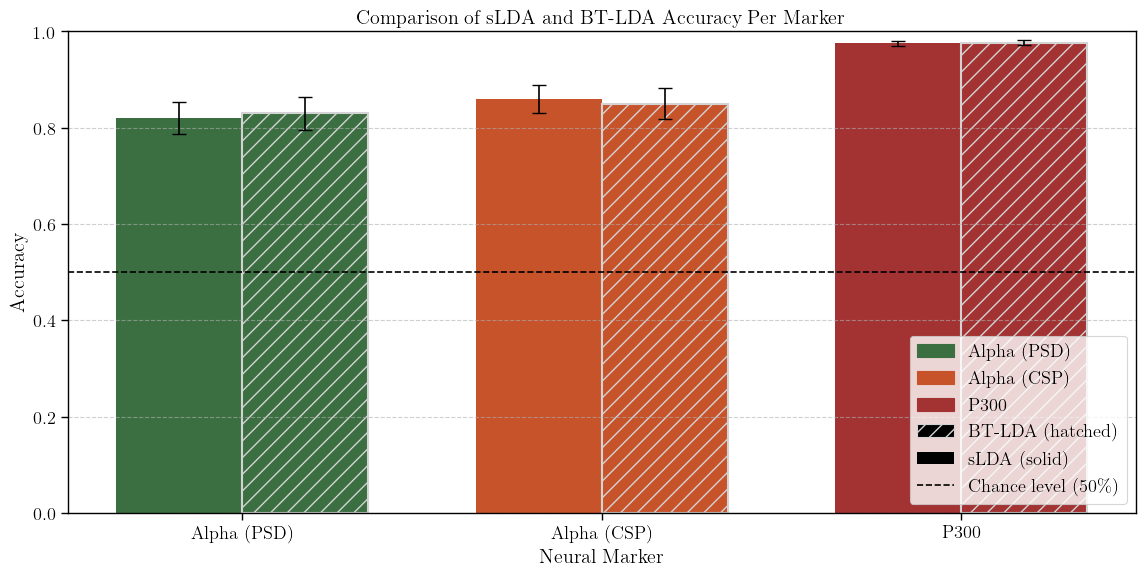

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Accuracy and error values
accuracies = np.array([
    alpha_PSD_ICA_mean_accuracy, alpha_PSD_TP_ICA_mean_accuracy,
    alpha_CSP_ICA_mean_accuracy, alpha_CSP_TP_ICA_mean_accuracy,
    p300_ICA_mean_accuracy, overall_accuracy_mean
])
errors = np.array([
    np.mean(alpha_PSD_ICA_sd), np.mean(alpha_PSD_TP_ICA_sd),
    np.mean(alpha_CSP_ICA_sd), np.mean(alpha_CSP_TP_ICA_sd),
    p300_ICA_sd, p300_ICA_TP_sd
])

# Group labels and colors
marker_labels = ['Alpha (PSD)', 'Alpha (CSP)', 'P300']
n_groups = len(marker_labels)

# Organize into shape (3 markers, 2 methods: sLDA, BT-LDA)
accuracies_grouped = accuracies.reshape(n_groups, 2)
errors_grouped = errors.reshape(n_groups, 2)

x = np.arange(n_groups)
bar_width = 0.35

# Academic dark colors
dark_colors = {
    'Alpha (PSD)': '#3b6f41',  # Dark Green
    'Alpha (CSP)': '#c7532b',  # Dark Orange
    'P300': '#a33333'          # Dark Red
}

colors_slda = [dark_colors[label] for label in marker_labels]

sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

# Plot sLDA bars (solid)
for i in range(n_groups):
    ax.bar(x[i] - bar_width / 2, accuracies_grouped[i, 0], bar_width,
           yerr=errors_grouped[i, 0], color=colors_slda[i], capsize=5, label='sLDA' if i == 0 else "")

# Plot BT-LDA bars (hatched with lightgray hatch color)
for i in range(n_groups):
    rect = mpatches.Rectangle(
        (x[i] + bar_width / 2 - bar_width / 2, 0),
        width=bar_width,
        height=accuracies_grouped[i, 1],
        facecolor=colors_slda[i],
        edgecolor='lightgray',
        hatch='//',
        linewidth=1.5
    )
    ax.add_patch(rect)
    ax.errorbar(x[i] + bar_width / 2, accuracies_grouped[i, 1],
                yerr=errors_grouped[i, 1], fmt='none', ecolor='black', capsize=5)

# Axes labels and appearance
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neural Marker')
ax.set_title('Comparison of sLDA and BT-LDA Accuracy Per Marker')
ax.set_xticks(x)
ax.set_xticklabels(marker_labels)
ax.set_ylim(0, 1)
ax.tick_params(axis='y')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
legend_handles = [
    mpatches.Patch(color=dark_colors['Alpha (PSD)'], label='Alpha (PSD)'),
    mpatches.Patch(color=dark_colors['Alpha (CSP)'], label='Alpha (CSP)'),
    mpatches.Patch(color=dark_colors['P300'], label='P300'),
    mpatches.Patch(facecolor='black', edgecolor='lightgray', hatch='//', label='BT-LDA (hatched)'),
    mpatches.Patch(facecolor='black', label='sLDA (solid)'),
            mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower right')

plt.axhline(0.5, linestyle='--', color='black')

# Save and show
plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/btlda_vs_slda_grouped.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


In [8]:
from scipy.stats import wilcoxon

# # --- P300 ---
W_p300, p_p300 = wilcoxon(p300_ICA_accuracy[:-1], p300_ICA_TP_accuracy[:-1], alternative='greater') # Exclude the last entry: overall accuracy
print(f"P300: W={W_p300:.3f}, p={p_p300:.3f}")

# --- PSD (alpha) ---
W_psd, p_psd = wilcoxon(alpha_PSD_ICA_accuracy.flatten(), alpha_PSD_TP_ICA_accuracy.flatten(), alternative='greater')
print(f"Alpha PSD: W={W_psd:.3f}, p={p_psd:.3f}")

# --- CSP (alpha) ---
W_csp, p_csp = wilcoxon(alpha_CSP_ICA_accuracy.flatten(), alpha_CSP_TP_ICA_accuracy.flatten(), alternative='greater')
print(f"Alpha CSP: W={W_csp:.3f}, p={p_csp:.3f}")


P300: W=66.000, p=0.692
Alpha PSD: W=158.500, p=0.668
Alpha CSP: W=137.500, p=0.108


In [53]:
print(alpha_PSD_ICA_accuracy)
print(alpha_PSD_TP_ICA_accuracy)

[0.75 0.86 0.82 0.68 0.81 0.89 0.88 0.9  0.88 0.72 0.7  0.96 0.98 0.79
 0.84 0.54 0.88 0.81 0.94 1.   0.51 0.95 0.89 0.85 0.76 0.75 0.81 0.92
 0.8 ]
[0.75 0.84 0.75 0.61 0.7  0.8  0.82 0.91 0.84 0.66 0.59 0.98 0.96 0.72
 0.81 0.57 0.86 0.77 0.9  0.98 0.54 0.92 0.86 0.81 0.77 0.69 0.82 0.9
 0.73]


## Pairwise markers
### P300 + c-VEP (ICA)

In [54]:
print(p300_ICA_accuracy.mean())
print(p300_ICA_TP_accuracy.mean())

0.9590517241379309
0.9525862068965518


### P300 + alpha (first approach, PSD and ICA)

/var/folders/qx/1c8hj9_92533cb1kgn4q_yt80000gn/T/ipykernel_8295/1083614408.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (30,) and arg 1 with shape (7,).

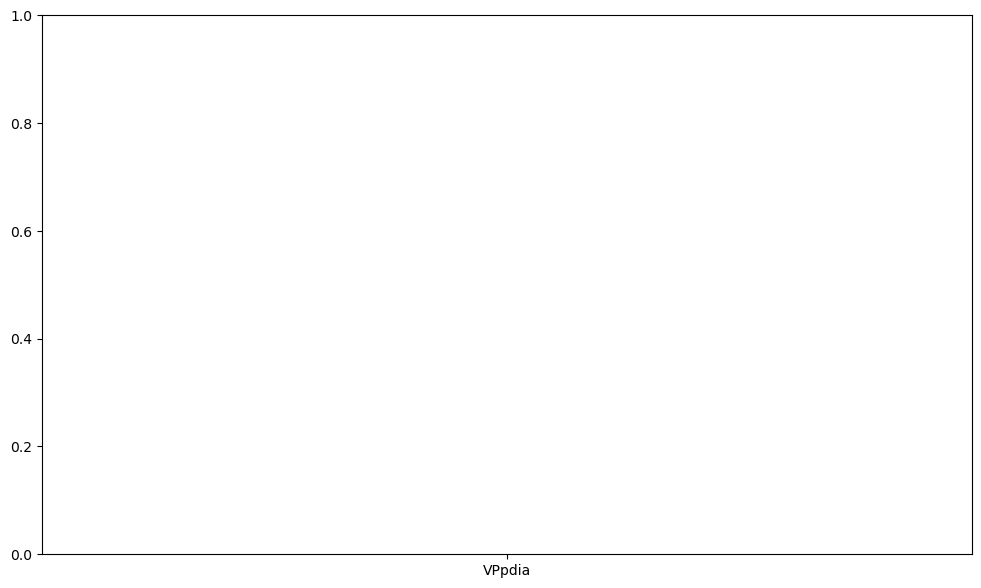

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the results from the .npy file
results_load_path = '/Users/juliette/Desktop/thesis/results/alpha+p300/covert_alpha_p300_results_concat.npy' 

# Load the results as a structured numpy array
results_array = np.load(results_load_path, allow_pickle=True)

# Extract the accuracies, subjects, and standard errors
accuracies_concat_1 = results_array['accuracy']
subjects = results_array['subject']
standard_error = results_array['standard_error']

# Calculate the grand average accuracy and standard error
grand_average = np.mean(accuracies)
grand_standard_error = np.round(results_array['standard_error'].mean(), 2) # SE for the grand average

# Add the grand average to the data
accuracies = np.append(accuracies, grand_average)
standard_error = np.append(standard_error, grand_standard_error)
subjects = np.append(subjects, 'Grand Average')

# Define custom colors
subs = 'steelblue'
avg = 'darkorange'
colors = [subs] * (len(accuracies) - 1) + [avg]

# Create the bar plot with accuracy on the y-axis
plt.figure(figsize=(12, 7))
bars = plt.bar(subjects, accuracies, yerr=standard_error, color=colors, capsize=5, alpha=0.85)

# Add a red line at y = 0.78
plt.axhline(y=0.78, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Accuracy') 
plt.title(f'Classification Accuracies Approach 1: Alpha (PSD) + P300 (Grand Avg: {grand_average:.2f} ± {grand_standard_error:.2f})')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set y-axis limits
plt.ylim(0, 1)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add a legend
legend_patches = [
    mpatches.Patch(color=avg, label='Grand Average'),
    mpatches.Patch(color=subs, label='Subjects'),
    mpatches.Patch(color='red', label='Accuracy (Egan)')
]
plt.legend(handles=legend_patches)

# Save the figure with high resolution
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/accuracy_comparison_with_grand_avg_approach1.png', 
            dpi=300, bbox_inches='tight')  

# Display the plot
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (30,) and arg 1 with shape (8,).

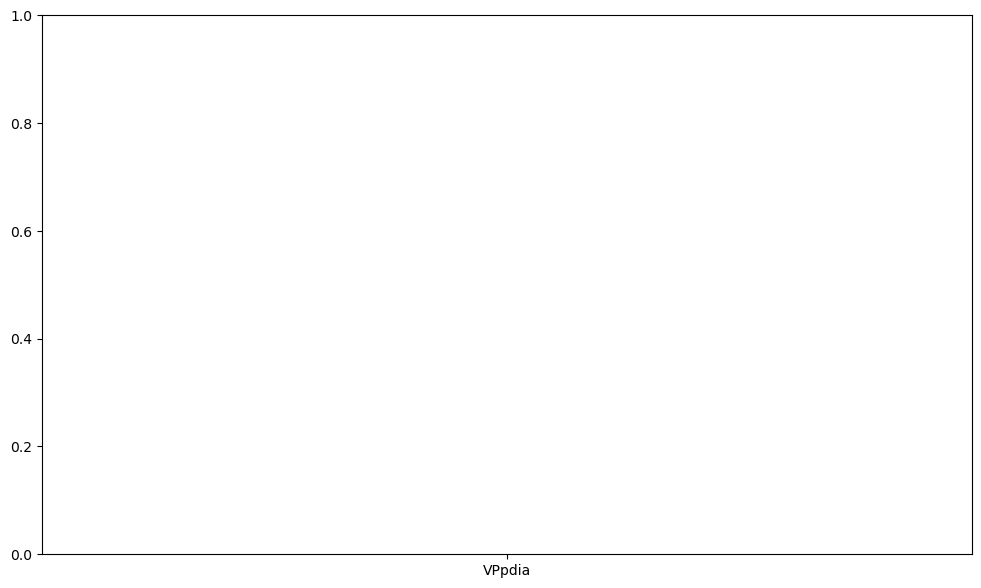

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the results from the .npy file
results_load_path = '/Users/juliette/Desktop/thesis/results/alpha+p300/covert_hybrid_alpha_p300_egan_results.npy' 

# Load the results as a structured numpy array
results_array = np.load(results_load_path, allow_pickle=True)

# Extract the accuracies, subjects, and standard errors
accuracies_concat_2 = results_array['accuracy']
subjects = results_array['subject']
standard_error = results_array['standard_error']

# Calculate the grand average accuracy and standard error
grand_average = np.mean(accuracies)
grand_standard_error = np.round(results_array['standard_error'].mean(), 2) # SE for the grand average

# Add the grand average to the data
accuracies = np.append(accuracies, grand_average)
standard_error = np.append(standard_error, grand_standard_error)
subjects = np.append(subjects, 'Grand Average')

# Define custom colors
subs = 'steelblue'
avg = 'darkorange'
colors = [subs] * (len(accuracies) - 1) + [avg]

# Create the bar plot with accuracy on the y-axis
plt.figure(figsize=(12, 7))
bars = plt.bar(subjects, accuracies, yerr=standard_error, color=colors, capsize=5, alpha=0.85)

# Add a red line at y = 0.78
plt.axhline(y=0.78, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Accuracy') 
plt.title(f'Classification Accuracies Approach 2: Alpha (PSD) + P300 (Grand Avg: {grand_average:.2f} ± {grand_standard_error:.2f})')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set y-axis limits
plt.ylim(0, 1)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add a legend
legend_patches = [
    mpatches.Patch(color=avg, label='Grand Average'),
    mpatches.Patch(color=subs, label='Subjects'),
    mpatches.Patch(color='red', label='Accuracy (Egan)')
]
plt.legend(handles=legend_patches)

# Save the figure with high resolution
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/accuracy_comparison_with_grand_avg_approach2.png', 
            dpi=300, bbox_inches='tight')  

# Display the plot
plt.show()


In [93]:
# Comparison of alpha decoding with PSD and CSP
w_stat_concat, p_value_w_concat = stats.wilcoxon(accuracies_concat_1.flatten(), accuracies_concat_2.flatten())
print(f"Wilcoxon test for concatenation methods: W={w_stat_concat:.3f}, p={p_value_w_concat:.3f}")



Wilcoxon test for concatenation methods: W=174.500, p=0.980


### Comparison between the pairwise markers.

Average accuracy for covert trials of c-VEP + P300: 0.928


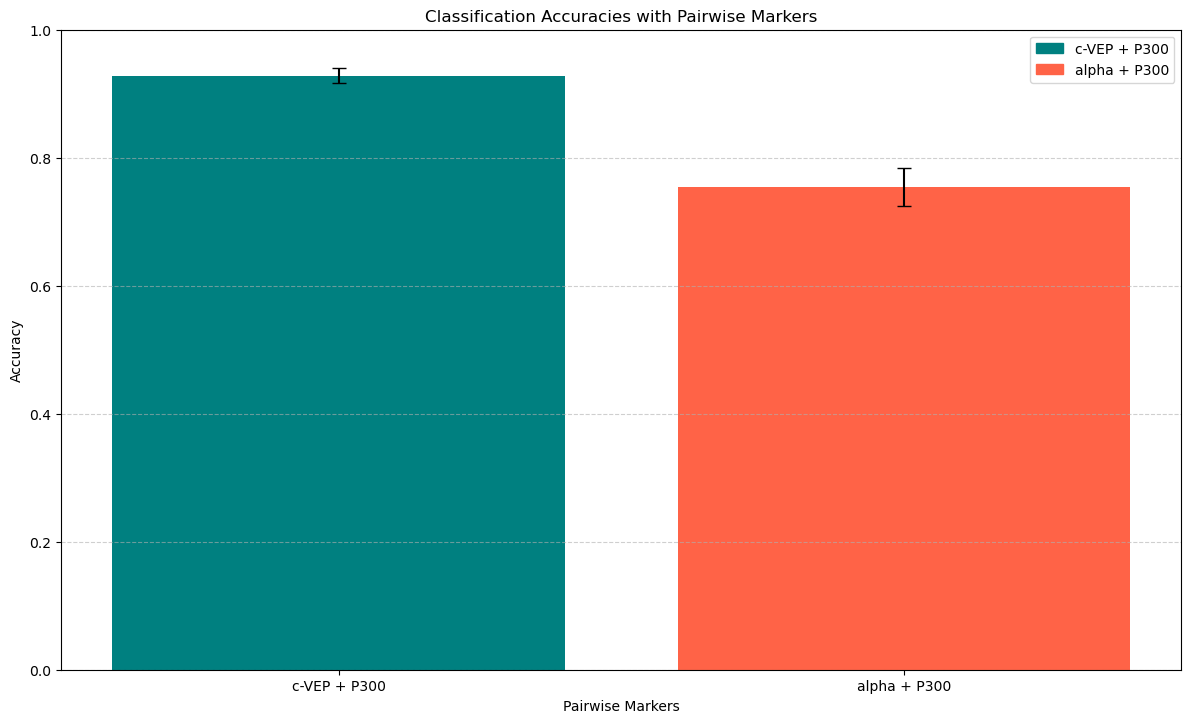

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Accuracy for c-VEP + P300 with ICA
cVEP_p300_results = np.load('/Users/juliette/Desktop/thesis/results/c-VEP+P300/cvep_rcca_p300_ICA.npz')
cVEP_p300_accuracy = cVEP_p300_results['accuracy'] 

covert_mean_cVEP_p300 = cVEP_p300_accuracy[:, 1, :].mean()
print(f"Average accuracy for covert trials of c-VEP + P300: {covert_mean_cVEP_p300:.3f}")
covert_se_cVEP_p300 = cVEP_p300_results['accuracy_se'].mean()


alpha_p300_path = '/Users/juliette/Desktop/thesis/results/alpha+p300/covert_alpha_p300_results_concat.npy' 
results_array = np.load(results_load_path, allow_pickle=True)
alpha_p_mean = np.mean(results_array['accuracy'])
alpha_p_sd = np.round(results_array['standard_error'].mean(), 2)


# Define the accuracies and errors
accuracies = [covert_mean_cVEP_p300, alpha_p_mean]
errors = [covert_se_cVEP_p300, alpha_p_sd]

# Labels for each neural marker
labels = ['c-VEP + P300', 'alpha + P300']

# Colors for the bars 
colors = ['teal', 'tomato']  

# Create the bar plot with accuracy on the x-axis
plt.figure(figsize=(14, 8))
bars = plt.bar(labels, accuracies, yerr=errors, color=colors, capsize=5)

# Add labels and title
plt.xlabel('Pairwise Markers')
plt.ylabel('Accuracy') 
plt.title('Classification Accuracies with Pairwise Markers')

# Set y-axis limits
plt.ylim(0, 1)

# Create spacing between bars
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add a legend
legend_labels = ['c-VEP + P300', 'alpha + P300']
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=patches, loc='upper right')

# Save the figure with high resolution
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/Toeplitz_accuracy_comparison_SD.png', dpi=300, bbox_inches='tight')  

# Display the plot
plt.show()


Compare all individual pipelines

In [9]:
# Firstly, compare P300+BT-LDA against CSP alpha (both ICA)
w_alpha_p300_compare, p_value_alpha_p300_compare = stats.wilcoxon(alpha_CSP_ICA_accuracy.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='less')
print(f"Wilcoxon test for P300 against alpha with ICA: W={w_alpha_p300_compare:.3f}, p={p_value_alpha_p300_compare:.3f}")

# Secondly, compare P300+BT-LDA against c-VEP (both ICA)
cVEP_ICA_mean_accuracy = cVEP_ICA_accuracy[:, 1, :].mean(axis=1)
w_cvep_p300_compare, p_value_cvep_p300_compare = stats.wilcoxon(cVEP_ICA_mean_accuracy.flatten(), p300_ICA_TP_accuracy.flatten()[:-1],alternative='less')
print(f"Wilcoxon test for P300 against c-VEP both with ICA and BT-LDA: W={w_cvep_p300_compare:.3f}, p={p_value_cvep_p300_compare:.3f}")

# Thirdly compare CSPalpha against c-VEP (both ICA)
w_alpha_cvep_compare, p_value_alpha_cvep_compare = stats.wilcoxon(cVEP_ICA_mean_accuracy.flatten(), alpha_CSP_ICA_accuracy.flatten(), alternative='less')
print(f"Wilcoxon test for c-VEP against alpha, both with ICA: W={w_alpha_cvep_compare:.3f}, p={p_value_alpha_cvep_compare:.3f}")

Wilcoxon test for P300 against alpha with ICA: W=39.000, p=0.000
Wilcoxon test for P300 against c-VEP both with ICA and BT-LDA: W=0.000, p=0.000
Wilcoxon test for c-VEP against alpha, both with ICA: W=35.000, p=0.000


In [32]:
cVEP_ICA_mean_accuracy = cVEP_ICA_accuracy[:, 1, :].mean(axis=1)
print(cVEP_ICA_mean_accuracy)
print(p300_ICA_TP_accuracy.flatten()[:-1])

[0.5625 0.6    0.5875 0.6125 0.6375 0.7125 0.725  0.725  0.6875 0.6625
 0.725  0.5875 0.6    0.85   0.675  0.8625 0.6    0.8    0.575  0.775
 0.7    0.8    0.55   0.6625 0.4875 0.575  0.5875 0.6    0.65  ]
[0.925  0.9875 0.9625 0.975  0.9375 0.9875 0.9625 1.     0.925  1.
 1.     0.95   1.     0.95   1.     1.     1.     1.     0.95   0.9625
 0.975  1.     0.9875 0.9625 0.9625 0.9875 1.     0.9875 0.9875]


## Hybrid comparison

In [10]:
# -- Full hybrid -- 
results_hybrid = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+p300+c-vep/cvep_p300_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_hybrid = results_hybrid['accuracy']      # shape: (n_subjects, n_folds)
stds_hybrid = results_hybrid['std']                 # shape: (n_subjects,)
average_accuracies_hybrid = np.mean(accuracies_hybrid, axis=1)
print(f"Average accuracy of full hybrid is {average_accuracies_hybrid.mean():.2f} ± {stds_hybrid.mean():.2f}")

# -- Pairwise (alpha + c-VEP) --
results_pair_ac = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+c-vep/cvep_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_ac = results_pair_ac['accuracy']
stds_ac = results_pair_ac['std']
average_accuracies_ac = np.mean(accuracies_ac, axis=1)
print(f"Average accuracy of alpha+c-VEP is {average_accuracies_ac.mean():.2f} ± {stds_ac.mean():.2f}")

# -- Pairwise (alpha + p300) -- 
results_pair_ap = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+p300/p300_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_ap = results_pair_ap['accuracy']
stds_ap = results_pair_ap['std']
average_accuracies_ap = np.mean(accuracies_ap, axis=1)
print(f"Average accuracy of alpha+p300 is {average_accuracies_ap.mean():.2f} ± {stds_ap.mean():.2f}")

# -- Pairwise (p300 + c-VEP) --
results_pair_pc = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/p300+cvep/p300_cvep_hybrid_accuracy_results.npz')

# Access the data
accuracies_pc = results_pair_pc['accuracy']
stds_pc = results_pair_pc['std']
average_accuracies_pc = np.mean(accuracies_pc, axis=1)
print(f"Average accuracy of c-VEP+p300 is {average_accuracies_pc.mean():.2f} ± {stds_pc.mean():.2f}")

Average accuracy of full hybrid is 0.95 ± 0.03
Average accuracy of alpha+c-VEP is 0.94 ± 0.04
Average accuracy of alpha+p300 is 0.91 ± 0.04
Average accuracy of c-VEP+p300 is 0.82 ± 0.07


In [12]:
from scipy import stats

# --- P300 ---
# Accurady for p300 with ICA and BlockToeplitz
p300_ICA_TP_results = np.load('/Users/juliette/Desktop/thesis/results/P300/p300_ICA/covert_toeplitzLDA_p300_ICA_results.npy')

p300_ICA_TP_accuracy = p300_ICA_TP_results['correct_trials_mean']
p300_ICA_TP_mean_accuracy = p300_ICA_TP_results[p300_ICA_TP_results['subject_id'] == 'Overall']
overall_accuracy_mean = p300_ICA_TP_mean_accuracy['correct_trials_mean'][0]
p300_ICA_TP_sd = p300_ICA_TP_mean_accuracy['correct_trials_se'][0]

print(f"Overall LDA accuracy with P300, ICA, and BlockToeplitz LDA (covert): {overall_accuracy_mean:.2f} +_ {p300_ICA_TP_sd:.2f}")

# Firstly, compare full hybrid against best performing pairwise (alpha+c-VEP)
w_hybrid_compare, p_value_hybrid_compare = stats.wilcoxon(average_accuracies_hybrid.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='less')
print(f"Wilcoxon test for full hybrid against P300 and BT-LDA: W={w_hybrid_compare:.3f}, p={p_value_hybrid_compare:.3f}")

# Secondly, compare alpha+c-VEP against alpha (CSP+ICA)
w_ac_compare, p_value_ac_compare = stats.wilcoxon(average_accuracies_ac.flatten(), alpha_CSP_ICA_accuracy.flatten(),alternative='greater')
print(f"Wilcoxon test for alpha+c-VEP against alpha (CSP+ICA): W={w_ac_compare:.3f}, p={p_value_ac_compare:.3f}")

# Thirdly, compare alpha+p300 against p300 (ICA)
w_ap_compare, p_value_ap_compare = stats.wilcoxon(average_accuracies_ap.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='greater')
print(f"Wilcoxon test for alpha+p300 against P300 (ICA): W={w_ap_compare:.3f}, p={p_value_ap_compare:.3f}")

# Finally, compare p300+c-VEP against P300(ICA)
w_pc_compare, p_value_pc_compare = stats.wilcoxon(average_accuracies_pc.flatten(), p300_ICA_TP_accuracy.flatten()[:-1], alternative='greater')
print(f"Wilcoxon test for p300+c-VEP against P300 (ICA): W={w_pc_compare:.3f}, p={p_value_pc_compare:.3f}")






Overall LDA accuracy with P300, ICA, and BlockToeplitz LDA (covert): 0.98 +_ 0.00
Wilcoxon test for full hybrid against P300 and BT-LDA: W=96.000, p=0.021
Wilcoxon test for alpha+c-VEP against alpha (CSP+ICA): W=318.000, p=0.000
Wilcoxon test for alpha+p300 against P300 (ICA): W=66.000, p=0.998
Wilcoxon test for p300+c-VEP against P300 (ICA): W=0.000, p=1.000


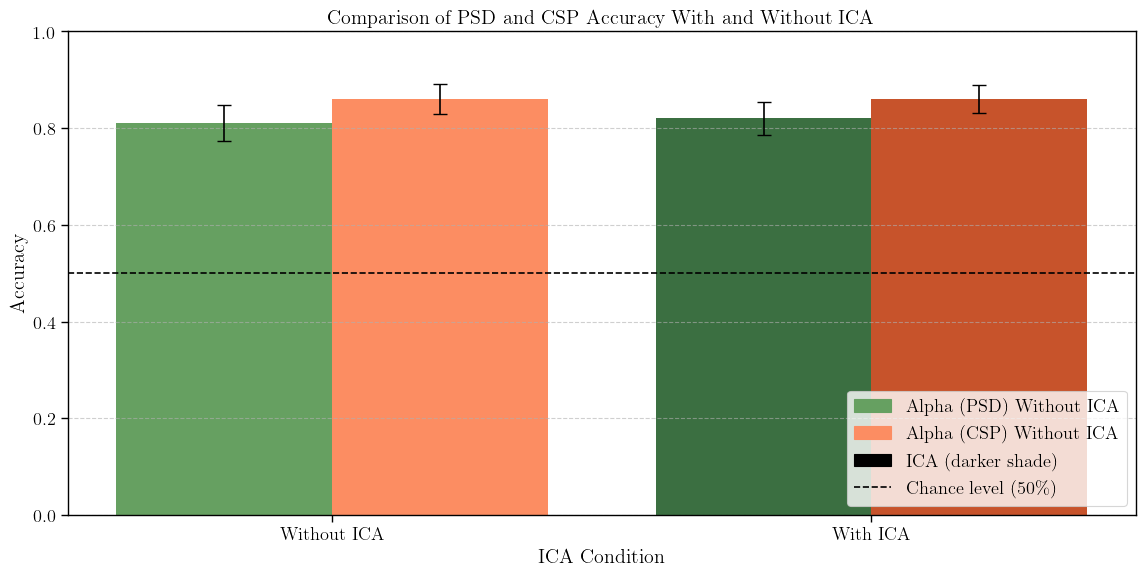

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Accuracy and error values for PSD and CSP, without ICA and with ICA
accuracies = np.array([
    alpha_PSD_mean_accuracy, alpha_CSP_mean_accuracy,  # Without ICA
    alpha_PSD_ICA_mean_accuracy, alpha_CSP_ICA_mean_accuracy  # With ICA
])
errors = np.array([
    np.mean(alpha_PSD_sd), np.mean(alpha_CSP_sd),
    np.mean(alpha_PSD_ICA_sd), np.mean(alpha_CSP_ICA_sd),
])

# We want 2 groups (ICA conditions):
group_labels = ['Without ICA', 'With ICA']
n_markers = 2  # PSD and CSP

# Reshape accuracies and errors to shape (2 ICA groups, 2 markers each)
accuracies_grouped = accuracies.reshape(2, n_markers)
errors_grouped = errors.reshape(2, n_markers)

# X positions for the 2 groups on the x-axis
x = np.arange(len(group_labels))
group_width = 0.8  # total width reserved for each ICA group
bar_width = group_width / n_markers  # width of each bar inside the group

# Base colors for PSD and CSP (without ICA)
base_colors = ['#66a061', '#fc8d62']  # PSD green, CSP orange

# Slightly darker colors for ICA (darker shade of base colors)
ica_colors = ['#3b6f41', '#c7532b']

sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

for i in range(n_markers):
    # Bars for "Without ICA" group (lighter color)
    ax.bar(x[0] - group_width/2 + i * bar_width + bar_width/2, 
           accuracies_grouped[0, i], width=bar_width, yerr=errors_grouped[0, i],
           color=base_colors[i], capsize=5, label=f'Alpha {"PSD" if i == 0 else "CSP"} (Without ICA)' if i == 0 else "")
    
    # Bars for "With ICA" group (darker color)
    ax.bar(x[1] - group_width/2 + i * bar_width + bar_width/2, 
           accuracies_grouped[1, i], width=bar_width, yerr=errors_grouped[1, i],
           color=ica_colors[i], capsize=5, label=f'Alpha {"PSD" if i == 0 else "CSP"} (With ICA)' if i == 0 else "")

# Labels and axes
ax.set_ylabel('Accuracy')
ax.set_xlabel('ICA Condition')
ax.set_title('Comparison of PSD and CSP Accuracy With and Without ICA')
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.tick_params(axis='y')

# Custom legend to distinguish colors and ICA status
legend_handles = [
    mpatches.Patch(color=base_colors[0], label='Alpha (PSD) Without ICA'),
    mpatches.Patch(color=base_colors[1], label='Alpha (CSP) Without ICA'),
    mpatches.Patch(color='black', label='ICA (darker shade)'),
    mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

    
    
]
 
plt.axhline(0.5, linestyle='--', color='black')
ax.legend(handles=legend_handles, loc='lower right')

plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/csp_vs_psd_grouped.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


# Comparisons: individual pipelines

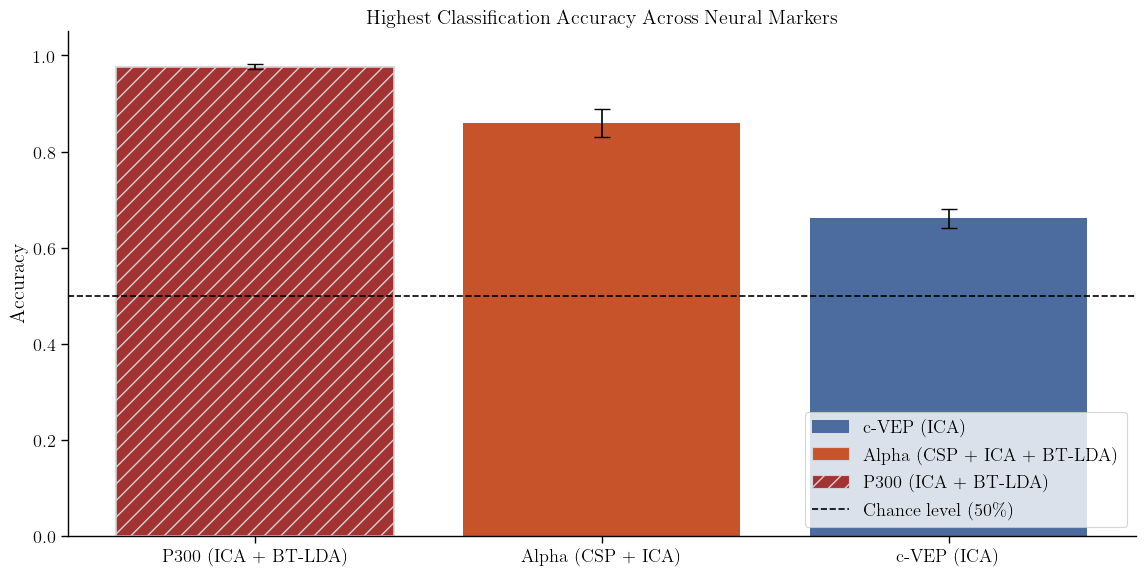

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Your actual values
group_1_accuracies = [
    p300_ICA_TP_mean_accuracy['correct_trials_mean'][0],
    np.mean(alpha_CSP_ICA_mean_accuracy),
    np.mean(covert_ICA_mean_cVEP)
]

group_1_se = [
    np.mean(p300_ICA_TP_sd),
    np.mean(alpha_CSP_ICA_sd),
    np.mean(cVEP_ICA_se)
]

labels = ['P300 (ICA + BT-LDA)', 'Alpha (CSP + ICA)', 'c-VEP (ICA)']
x = np.arange(len(labels))

# Define base colors
base_colors = {
    'P300 (ICA + BT-LDA)': '#a33333',            # Dark Red
    'Alpha (CSP + ICA)': '#c7532b',     # Dark Orange
    'c-VEP (ICA)': '#4c6ca0'            # Muted Blue
}

colors = [base_colors[label] for label in labels]

# Bigger figure
sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

bars = []
for i, label in enumerate(labels):
    if 'P300' in label:
        bar = ax.bar(x[i], group_1_accuracies[i], yerr=group_1_se[i], capsize=6,
                     color=colors[i], edgecolor='lightgray', linewidth=1.2, hatch='//')
    else:
        bar = ax.bar(x[i], group_1_accuracies[i], yerr=group_1_se[i], capsize=6,
                     color=colors[i])
    bars.append(bar)

# Styling
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Highest Classification Accuracy Across Neural Markers')
ax.spines[['top', 'right']].set_visible(False)

# Legend
legend_handles = [
    mpatches.Patch(facecolor=base_colors['c-VEP (ICA)'], label='c-VEP (ICA)'),
    mpatches.Patch(facecolor=base_colors['Alpha (CSP + ICA)'], edgecolor='lightgray', label='Alpha (CSP + ICA + BT-LDA)'),
    mpatches.Patch(facecolor=base_colors['P300 (ICA + BT-LDA)'], edgecolor='lightgray', hatch='//', label='P300 (ICA + BT-LDA)'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower right')
plt.axhline(0.5, linestyle='--', color='black')


plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/individual_comparisons.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


In [28]:
# -- Full hybrid -- 
results_hybrid = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+p300+c-vep/cvep_p300_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_hybrid = results_hybrid['accuracy']      # shape: (n_subjects, n_folds)
stds_hybrid = results_hybrid['std']                 # shape: (n_subjects,)
average_accuracies_hybrid = np.mean(accuracies_hybrid, axis=1)
print(f"Average accuracy of full hybrid is {average_accuracies_hybrid.mean():.2f} ± {stds_hybrid.mean():.2f}")

# -- Pairwise (alpha + c-VEP) --
results_pair_ac = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+c-vep/cvep_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_ac = results_pair_ac['accuracy']
stds_ac = results_pair_ac['std']
average_accuracies_ac = np.mean(accuracies_ac, axis=1)
print(f"Average accuracy of alpha+c-VEP is {average_accuracies_ac.mean():.2f} ± {stds_ac.mean():.2f}")

# -- Pairwise (alpha + p300) -- 
results_pair_ap = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/alpha+p300/p300_alpha_hybrid_accuracy_results.npz')

# Access the data
accuracies_ap = results_pair_ap['accuracy']
stds_ap = results_pair_ap['std']
average_accuracies_ap = np.mean(accuracies_ap, axis=1)
print(f"Average accuracy of alpha+p300 is {average_accuracies_ap.mean():.2f} ± {stds_ap.mean():.2f}")

# -- Pairwise (p300 + c-VEP) --
results_pair_pc = np.load('/Users/juliette/Desktop/thesis/results/hybrid_simple/p300+cvep/p300_cvep_hybrid_accuracy_results.npz')

# Access the data
accuracies_pc = results_pair_pc['accuracy']
stds_pc = results_pair_pc['std']
average_accuracies_pc = np.mean(accuracies_pc, axis=1)
print(f"Average accuracy of c-VEP+p300 is {average_accuracies_pc.mean():.2f} ± {stds_pc.mean():.2f}")

Average accuracy of full hybrid is 0.95 ± 0.03
Average accuracy of alpha+c-VEP is 0.94 ± 0.04
Average accuracy of alpha+p300 is 0.91 ± 0.04
Average accuracy of c-VEP+p300 is 0.82 ± 0.07


## Final big plot

In [29]:
average_accuracies_ac

array([0.6   , 1.    , 0.9625, 0.8   , 0.9   , 0.975 , 0.9625, 0.9625,
       0.9875, 0.875 , 0.9125, 0.975 , 1.    , 0.9875, 0.9875, 0.9875,
       0.9375, 0.95  , 0.975 , 1.    , 0.9   , 0.9875, 0.9625, 1.    ,
       0.95  , 0.9   , 0.975 , 0.975 , 0.8125])

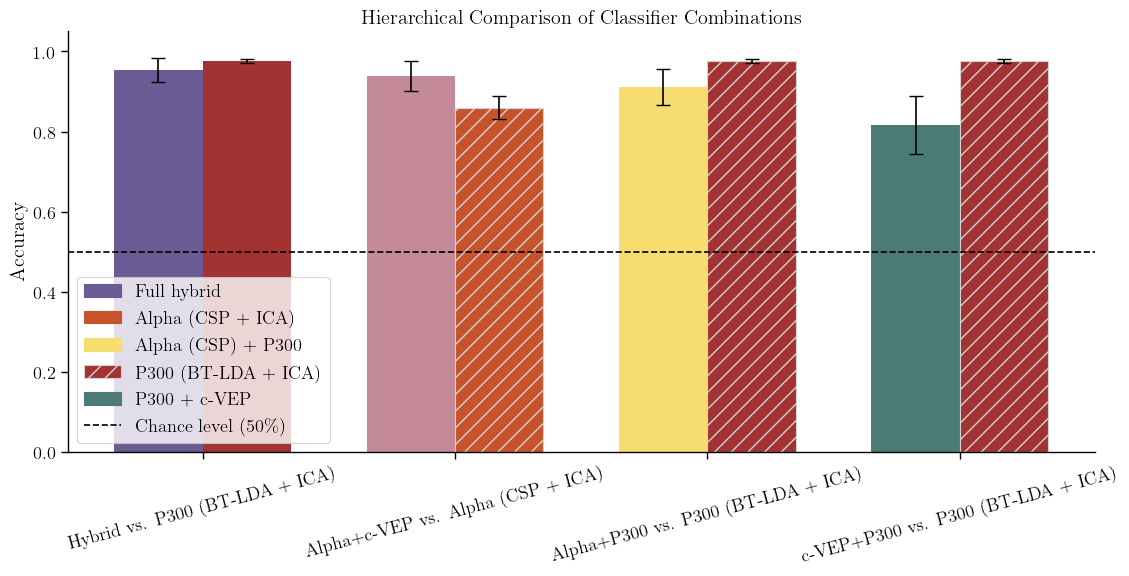

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


# Accuracy and standard error arrays
all_accuracies = np.array([
    [np.mean(average_accuracies_hybrid), overall_accuracy_mean],
    [np.mean(average_accuracies_ac), alpha_CSP_ICA_mean_accuracy],
    [np.mean(average_accuracies_ap), overall_accuracy_mean],
    [np.mean(average_accuracies_pc), overall_accuracy_mean]
])
all_se = np.array([
    [np.mean(stds_hybrid), np.mean(p300_ICA_TP_sd)],
    [np.mean(stds_ac), np.mean(alpha_CSP_ICA_sd)],
    [np.mean(stds_ap), np.mean(p300_ICA_TP_sd)],
    [np.mean(stds_pc), np.mean(p300_ICA_TP_sd)]
])

# Flatten to 1D arrays by combining all values
all_accuracies_flat = all_accuracies.flatten()
all_se_flat = all_se.flatten()

# Plot setup
labels = [
    'Hybrid vs. P300 (BT-LDA + ICA)',
    'Alpha+c-VEP vs. Alpha (CSP + ICA)',
    'Alpha+P300 vs. P300 (BT-LDA + ICA)',
    'c-VEP+P300 vs. P300 (BT-LDA + ICA)'
]
x = np.arange(len(labels))  # group locations
width = 0.35

# Assign a unique color to each bar
bar_colors = [
'#6B5B95', '#a33333',   # Group 1
'#C48A99', '#c7532b', # Group 2
'#f7dc6f',  '#a33333',  # Group 3
'#4C7A75','#a33333'# Group 4
]

# Bigger figure
sns.set_context("paper", font_scale=1.5)
plt.rc(group='text', usetex=True)
plt.rc(group='font', family='serif')

# Plot
fig, ax = plt.subplots(figsize=(11.69, 6))

# Flatten the values for plotting
acc_values = all_accuracies.flatten()
se_values = all_se.flatten()

# Calculate bar positions
bar_positions = []
for i in range(len(x)):
    bar_positions.append(x[i] - width/2)  # first bar
    bar_positions.append(x[i] + width/2)  # second bar

for i in range(len(bar_positions)):
    if i in [3, 5, 7]:  # P300 bars to hatch
        ax.bar(bar_positions[i], acc_values[i], width=width,
               yerr=se_values[i], capsize=5,
               color=bar_colors[i],
               hatch='//', edgecolor='lightgrey')
    else:
        ax.bar(bar_positions[i], acc_values[i], width=width,
               yerr=se_values[i], capsize=5,
               color=bar_colors[i])

# Formatting
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.set_title('Hierarchical Comparison of Classifier Combinations')
ax.spines[['top', 'right']].set_visible(False)

# Optional: Add grid and legend if needed
# Legend
legend_handles = [
    mpatches.Patch(color='#6B5B95', label='Full hybrid'),
    mpatches.Patch(color='#c7532b', label='Alpha (CSP + ICA)'),
    mpatches.Patch(color='#f7dc6f', label='Alpha (CSP) + P300'),
    mpatches.Patch(facecolor='#a33333', edgecolor='lightgray', hatch='//', label='P300 (BT-LDA + ICA)'),
    mpatches.Patch(color='#4C7A75', label='P300 + c-VEP'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50\%)')  # This adds the dashed line to legend

]
ax.legend(handles=legend_handles, loc='lower left')
plt.axhline(0.5, linestyle='--', color='black')


# Save and show
plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/hierarchical_comparison_colored.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()


In [ ]:
# Accuracy for CSP with ICA and BlockToeplitz
alpha_CSP_TP_ICA_results = np.load('/Users/juliette/Desktop/thesis/results/alpha/alpha_ICA/covert_alpha_4-comp_CSP_BLT_ICA_results.npy')

alpha_CSP_TP_ICA_accuracy = alpha_CSP_TP_ICA_results['accuracy']
alpha_CSP_TP_ICA_mean_accuracy = np.round(alpha_CSP_TP_ICA_accuracy.mean(), 2)
alpha_CSP_TP_ICA_sd = alpha_CSP_TP_ICA_results['standard_error'].mean()

print(f"Overall LDA accuracy with CSP, ICA and BlockToeplitz (covert): {alpha_CSP_TP_ICA_mean_accuracy:.2f} +- {alpha_CSP_TP_ICA_sd:.2f}")

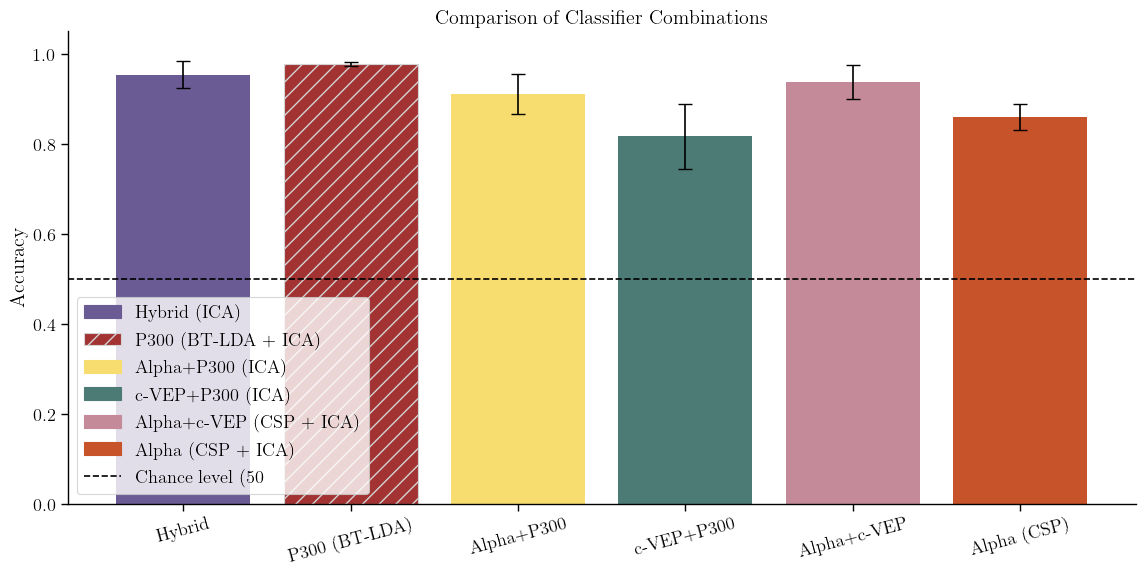

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

# Rearranged data so Alpha+c-VEP is last
all_accuracies = np.array([
    np.mean(average_accuracies_hybrid),  # Hybrid
    overall_accuracy_mean,                # P300 (BT-LDA)
    np.mean(average_accuracies_ap),      # Alpha+P300
    np.mean(average_accuracies_pc),      # c-VEP+P300
    np.mean(average_accuracies_ac),       # Alpha+c-VEP moved last
    np.mean(alpha_CSP_ICA_mean_accuracy)
])

all_se = np.array([
    np.mean(stds_hybrid),                # Hybrid
    np.mean(p300_ICA_TP_sd),             # P300 (BT-LDA)
    np.mean(stds_ap),                    # Alpha+P300
    np.mean(stds_pc),                    # c-VEP+P300
    np.mean(stds_ac),                     # Alpha+c-VEP moved last
    np.mean(alpha_CSP_ICA_sd)
])

# Labels with Alpha+c-VEP last
labels = [
    'Hybrid',
    'P300 (BT-LDA)',
    'Alpha+P300',
    'c-VEP+P300',
    'Alpha+c-VEP',
    'Alpha (CSP)'
]

x = np.arange(len(labels))  # 5 bars total
width = 0.8

# Colors with Alpha+c-VEP last
bar_colors = ['#6B5B95', '#a33333', '#f7dc6f', '#4C7A75', '#C48A99', '#c7532b']

# Plot styling
sns.set_context("paper", font_scale=1.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(11.69, 6))

# Plot bars (one per group)
for i in range(len(x)):
    hatch = '//' if labels[i] == 'P300 (BT-LDA)' else None
    edgecolor = 'lightgrey' if hatch else None
    
    ax.bar(x[i], all_accuracies[i], width=width, yerr=all_se[i],
           capsize=5, color=bar_colors[i], hatch=hatch, edgecolor=edgecolor)

# Formatting
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.set_title('Comparison of Classifier Combinations')
ax.spines[['top', 'right']].set_visible(False)

# Chance line
plt.axhline(0.5, linestyle='--', color='black')

# Legend with Alpha+c-VEP last color
legend_handles = [
    mpatches.Patch(color='#6B5B95', label='Hybrid (ICA)'),
    mpatches.Patch(facecolor='#a33333', edgecolor='lightgrey', hatch='//', label='P300 (BT-LDA + ICA)'),
    mpatches.Patch(color='#f7dc6f', label='Alpha+P300 (ICA)'),
    mpatches.Patch(color='#4C7A75', label='c-VEP+P300 (ICA)'),
    mpatches.Patch(color='#C48A99', label='Alpha+c-VEP (CSP + ICA)'),
    mpatches.Patch(color='#c7532b', label='Alpha (CSP + ICA)'),
    mlines.Line2D([], [], color='black', linestyle='--', label='Chance level (50%)')
]
ax.legend(handles=legend_handles, loc='lower left')

plt.tight_layout()
plt.savefig('/Users/juliette/Desktop/thesis/results/statistics/hierarchical_comparison_colored.png',
            bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()
